## P1 

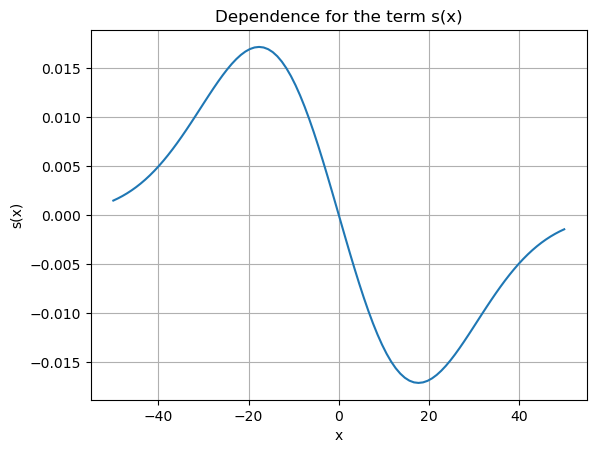

In [11]:
import numpy as np
import matplotlib.pyplot as plt
sigma0 = 1
w0 = 25
L = 100

xmin = -L/2
xmax = L/2

x = np.linspace(xmin,xmax,100)
s_x = np.zeros(len(x))

for i in range(len(x)):
    tmp = -x[i]*(sigma0/w0)**2
    s_x[i] = tmp*np.exp(-(x[i]**2)/(w0**2))

plt.plot(x, s_x)
plt.xlabel('x')
plt.ylabel('s(x)')
plt.title('Dependence for the term s(x)')
plt.grid(True)
plt.show()

## P2 

In [ ]:
alpha = 0

sigma0 = 1
dt = 1  # Time step.
N_traj = 20000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10,25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

w0 = 25

x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.


for j in range(np.size(j_mult)):
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):

        sigma_x = sigma0*np.exp((-x**2)/(2*w0**2))

        tmp = -x*(sigma0/w0)**2
        s_x = tmp*np.exp(-(x**2)/(w0**2))
        x += alpha*s_x*dt + sigma_x*np.sqrt(dt)* rn[:, step]


        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x



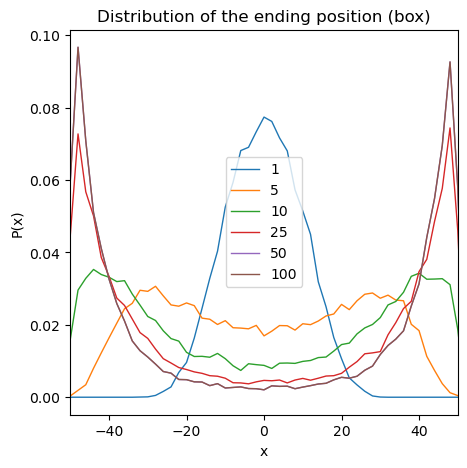

In [13]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box)')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()